# 3D Rayleigh-Bénard

In [1]:
import numpy as np
import os
import h5py
import IPython

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
SIMULATION_NAME = '100_100_100_10000_0.7_0.01_20' # RB_{N0}_{N1}_{N3}_{Ra}_{Pr}_{Dt}_{EndTime}

In [3]:
simulation_dir = os.path.join(os.getcwd(), 'data', SIMULATION_NAME)
simulation_prefix = os.path.join(simulation_dir, 'sim')

temp_file = h5py.File(f'{simulation_prefix}_T.h5', 'r')
temps = temp_file['T']['3D']
temps = [temps[i] for i in sorted(temps.keys(), key=int)]
transposed_temps = [np.transpose(t, [0,2,1]) for t in temps]

vel_file = h5py.File(f'{simulation_prefix}_U.h5', 'r')
x_vels = vel_file['u0']['3D']
x_vels = [np.transpose(x_vels[i], [0,2,1]) for i in sorted(x_vels.keys(), key=int)]
y_vels = vel_file['u1']['3D']
y_vels = [np.transpose(y_vels[i], [0,2,1]) for i in sorted(y_vels.keys(), key=int)]
z_vels = vel_file['u2']['3D']
z_vels = [np.transpose(z_vels[i], [0,2,1]) for i in sorted(z_vels.keys(), key=int)]

mesh = np.meshgrid(*[temp_file['T']['mesh'][d] for d in ('x0', 'x1', 'x2')])
transposed_mesh = np.transpose(mesh[0], [0,2,1]), np.transpose(mesh[2], [0,2,1]), np.transpose(mesh[1], [0,2,1])

In [4]:
masked_temps = []
for t in map(np.array, temps):
    dif = np.max(t) - np.min(t)
    masked_temps.append(np.ma.masked_where((np.min(t) + 0.1*dif < t) & (t < np.max(t) - 0.1*dif), t))
    
transposed_masked_temps = []
for t in map(np.array, transposed_temps):
    dif = np.max(t) - np.min(t)
    transposed_masked_temps.append(np.ma.masked_where((np.min(t) + 0.1*dif < t) & (t < np.max(t) - 0.1*dif), t))

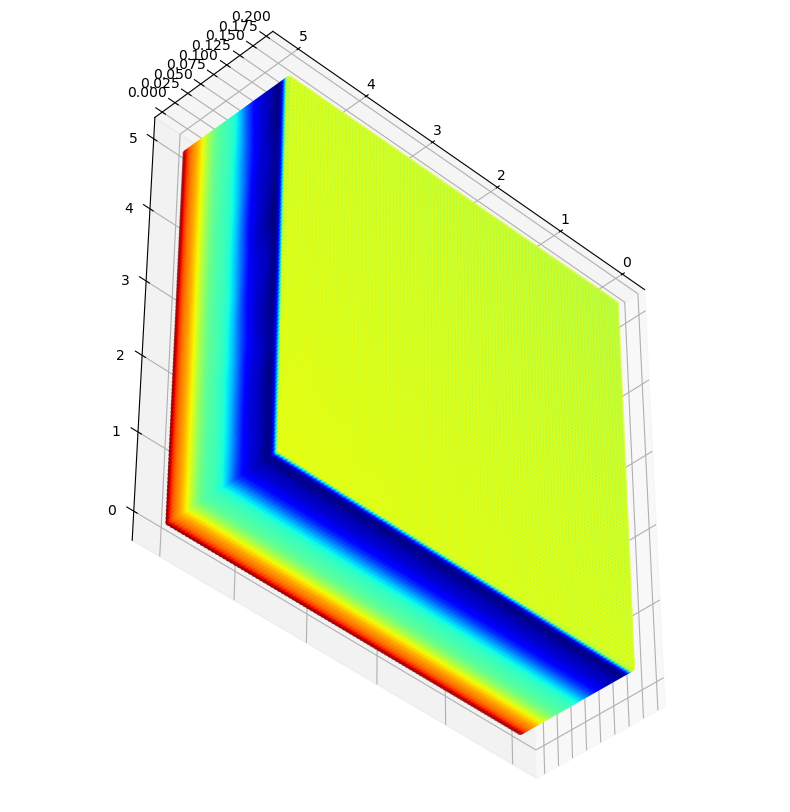

In [5]:
fig = plt.figure(figsize=(10, 10))
 
ax = plt.axes(projection='3d')
ax.view_init(elev=-40, azim=45)

ax.scatter(*mesh, c=temps[-1], cmap='jet')
ax.set_box_aspect((2*np.pi, 2, 2*np.pi))
 
plt.show()

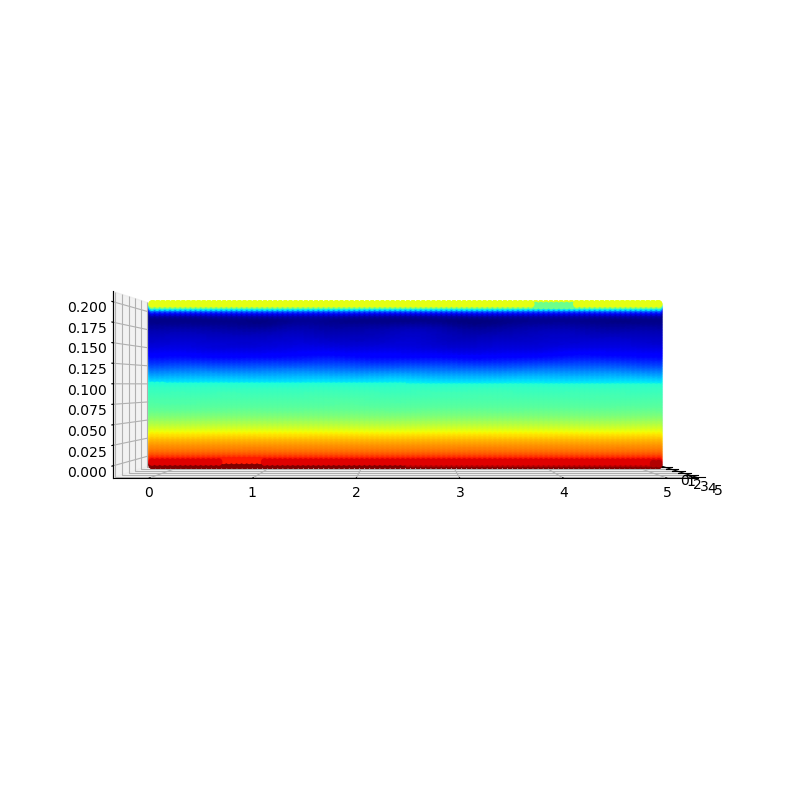

In [10]:
fig = plt.figure(figsize=(10, 10))
 
ax = plt.axes(projection='3d')
ax.view_init(elev=0, azim=0)

ax.scatter(*transposed_mesh, c=transposed_temps[-1], cmap='jet')
ax.set_box_aspect((2*np.pi, 2*np.pi, 2))
plt.show()

In [ ]:
fig = plt.figure()
 
ax = plt.axes(projection='3d')
ax.view_init(elev=-20, azim=45)
ax.set_box_aspect((2*np.pi, 2*np.pi, 2))
 
im = ax.scatter(*transposed_mesh, c=transposed_temps[0], cmap='jet')

plt.close() # this is required to not display the generated image

def animate(i):
    im.set_array(transposed_temps[i].reshape(-1))
    if i%10 == 0:
        print(f'{i}/{len(transposed_temps)}')
    return im

dt = float(SIMULATION_NAME.split('_')[-2])
anim = animation.FuncAnimation(fig, animate, frames=len(transposed_temps), interval=1000*dt)

# saving to m4 using ffmpeg writer 
writervideo = matplotlib.animation.FFMpegWriter(fps=10) 
anim.save(f'{simulation_prefix}_T.mp4', writer=writervideo) 

In [ ]:
IPython.display.Video(f'{simulation_prefix}_T.mp4')